In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


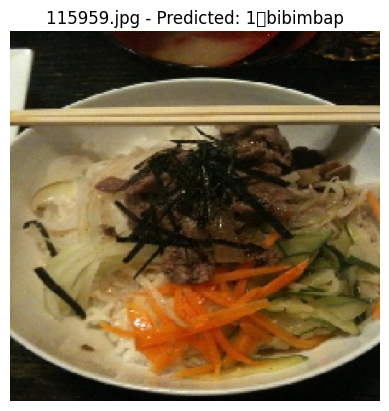

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


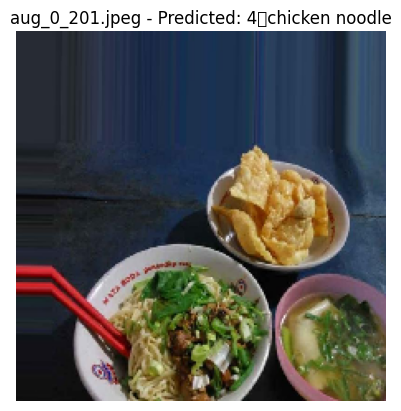

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


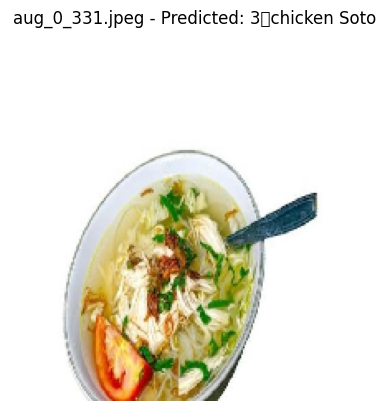

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


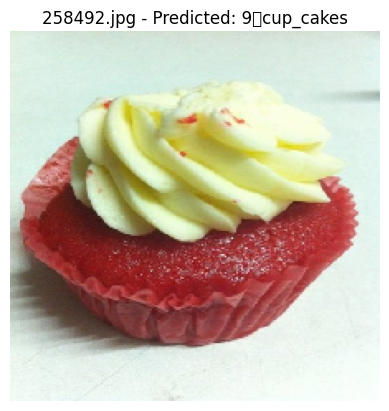

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


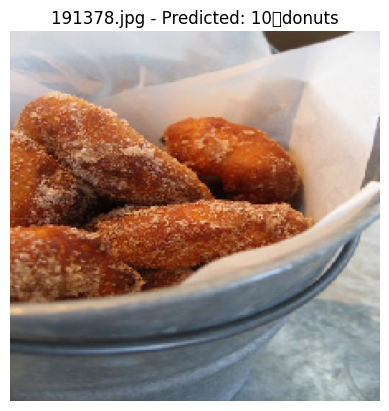

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


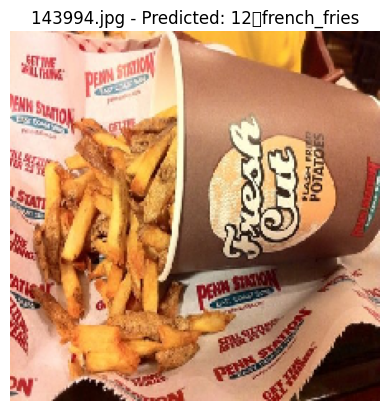

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


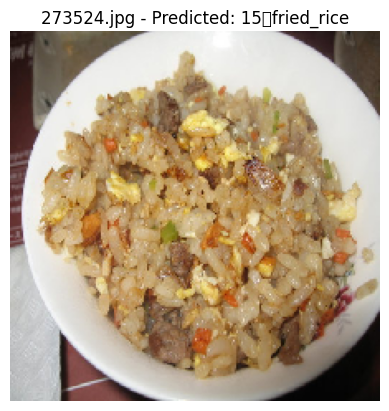

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


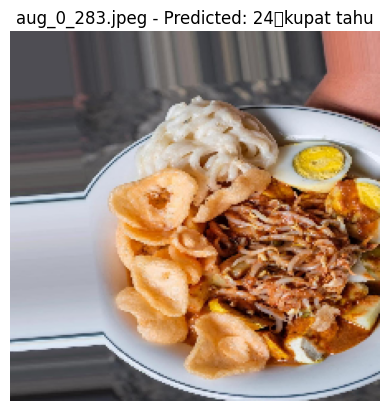

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


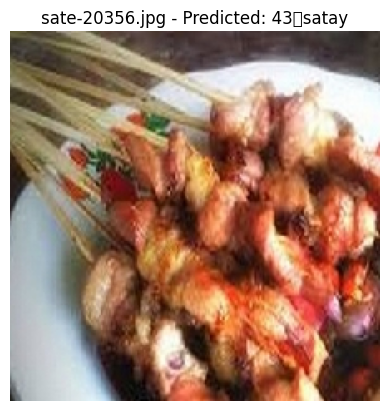

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


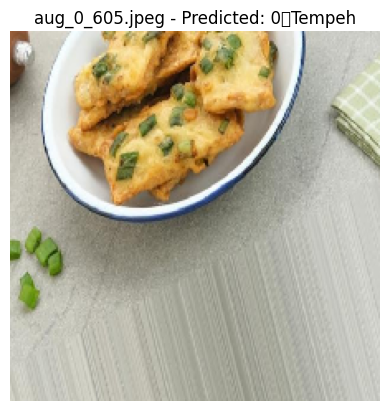

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


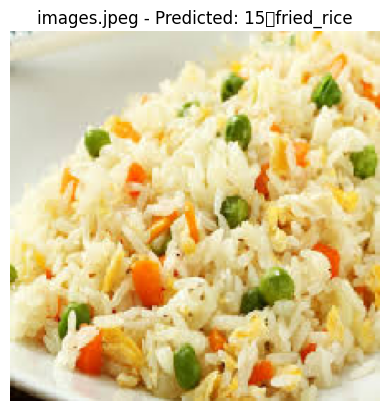

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files


model = load_model('/content/NutriCheck_model.h5')

def load_labels(label_file):
    with open(label_file, 'r') as file:
        labels = file.readlines()
    labels = [label.strip() for label in labels]
    return labels

labels = load_labels('/content/class_labels_NutriCheck.txt')

def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img, img_array


test_folder = '/content/drive/MyDrive/test'


test_images = [f for f in os.listdir(test_folder) if f.endswith(('jpg', 'png', 'jpeg'))]


for img_name in test_images:
    img_path = os.path.join(test_folder, img_name)


    img, img_array = preprocess_image(img_path, target_size=(224, 224))

    predictions = model.predict(img_array)


    predicted_class = np.argmax(predictions, axis=1)


    predicted_label = labels[predicted_class[0]]


    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{img_name} - Predicted: {predicted_label}")
    plt.show()
